Prev

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
ds = pd.read_csv("./HT_Sensor_dataset.dat", sep="\s+")
md = pd.read_csv("./HT_Sensor_metadata.dat", sep="\s+")
# y = df["Class"]

In [25]:
total = ds['id'].count()
total

928991

In [34]:
count = {'wine': 0, 'banana': 0, 'background': 0}
for i, c in zip(md['id'], md['class']):
    count[c] += ds[ds['id'] == i]['id'].count()

print(count)

{'wine': 346580, 'banana': 305444, 'background': 276967}


In [35]:
for k in count:
    print(k, 100 * count[k] / total)

wine 37.30714291096469
banana 32.879112930049914
background 29.813744158985394


Post

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar datos
df = pd.read_csv("./result.dat", sep="\s+")
df = df[df['id']>-1]
y = df["Class"]

In [66]:
t = y.count()
t

126385

In [67]:
a = y[y == 'wine'].count()
100 * a / t

42.37923804248922

In [68]:
a = y[y == 'banana'].count()
100 * a / t

30.91031372393876

In [69]:
a = y[y == 'background'].count()
100 * a / t

26.710448233572023

Atributos

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar datos
ds = pd.read_csv("./HT_Sensor_dataset.dat", sep="\s+")
md = pd.read_csv("./HT_Sensor_metadata.dat", sep="\s+")

In [15]:
tablaM, tablaS = dict(), dict()
clases = {'wine', 'banana', 'background'}
for atr in ds:
    if atr in {'id', 'time'}:
        continue
    tablaM[atr], tablaS[atr] = dict(), dict()
    print(atr)
    glob = ds[atr]
    m, s = round(np.mean(glob), 3), round(np.std(glob), 3)
    tablaM[atr]['global'], tablaS[atr]['global'] = m, s
    print('  global:'.ljust(15), f'mean={m},   std={s}')
    for c in clases:
        ids = md['id'][md['class']==c]
        data = []
        for i in ids:
            data.extend(ds[ds['id'] == i][atr])
        m, s = round(np.mean(data), 3), round(np.std(data), 3)
        tablaM[atr][c], tablaS[atr][c] = m, s
        print(f'  {c}:'.ljust(15), f'mean={m},   std={s}')

R1
  global:       mean=12.185,   std=0.868
  banana:       mean=12.214,   std=0.88
  background:   mean=12.417,   std=0.309
  wine:         mean=11.975,   std=1.083
R2
  global:       mean=8.958,   std=1.558
  banana:       mean=8.966,   std=1.574
  background:   mean=9.635,   std=0.627
  wine:         mean=8.411,   std=1.829
R3
  global:       mean=8.945,   std=1.749
  banana:       mean=8.951,   std=1.644
  background:   mean=9.782,   std=0.624
  wine:         mean=8.271,   std=2.119
R4
  global:       mean=10.13,   std=1.712
  banana:       mean=10.111,   std=1.733
  background:   mean=10.922,   std=0.723
  wine:         mean=9.514,   std=1.977
R5
  global:       mean=15.154,   std=18.392
  banana:       mean=17.473,   std=19.16
  background:   mean=11.813,   std=3.663
  wine:         mean=15.78,   std=23.63
R6
  global:       mean=16.052,   std=3.303
  banana:       mean=15.199,   std=2.422
  background:   mean=16.721,   std=0.778
  wine:         mean=16.271,   std=4.748
R7
  glob

In [13]:
tablaM

{'R1': {'global': 12.185,
  'banana': 12.214,
  'background': 12.417,
  'wine': 11.975},
 'R2': {'global': 8.958, 'banana': 8.966, 'background': 9.635, 'wine': 8.411},
 'R3': {'global': 8.945, 'banana': 8.951, 'background': 9.782, 'wine': 8.271},
 'R4': {'global': 10.13,
  'banana': 10.111,
  'background': 10.922,
  'wine': 9.514},
 'R5': {'global': 15.154,
  'banana': 17.473,
  'background': 11.813,
  'wine': 15.78},
 'R6': {'global': 16.052,
  'banana': 15.199,
  'background': 16.721,
  'wine': 16.271},
 'R7': {'global': 5.391, 'banana': 5.329, 'background': 6.052, 'wine': 4.916},
 'R8': {'global': 5.913, 'banana': 5.948, 'background': 6.509, 'wine': 5.405},
 'Temp.': {'global': 27.283,
  'banana': 27.147,
  'background': 27.563,
  'wine': 27.18},
 'Humidity': {'global': 57.568,
  'banana': 58.354,
  'background': 56.678,
  'wine': 57.587}}

In [4]:
x_labels = []
y_vals_M = {'global': [], 'wine': [], 'banana': [], 'background': []}
y_vals_S = {'global': [], 'wine': [], 'banana': [], 'background': []}
clases = {'wine', 'banana', 'background'}
for atr in ds:
    if atr in {'id', 'time'}:
        continue
    x_labels.append(atr)
    print(atr)
    glob = ds[atr]
    m, s = round(np.mean(glob), 3), round(np.std(glob), 3)
    y_vals_M['global'].append(m)
    y_vals_S['global'].append(s)
    print('  global:'.ljust(15), f'mean={m},   std={s}')
    for c in clases:
        ids = md['id'][md['class']==c]
        data = []
        for i in ids:
            data.extend(ds[ds['id'] == i][atr])
        m, s = round(np.mean(data), 3), round(np.std(data), 3)
        y_vals_M[c].append(m)
        y_vals_S[c].append(s)
        print(f'  {c}:'.ljust(15), f'mean={m},   std={s}')

R1
  global:       mean=12.185,   std=0.868
  background:   mean=12.417,   std=0.309
  wine:         mean=11.975,   std=1.083
  banana:       mean=12.214,   std=0.88
R2
  global:       mean=8.958,   std=1.558
  background:   mean=9.635,   std=0.627
  wine:         mean=8.411,   std=1.829
  banana:       mean=8.966,   std=1.574
R3
  global:       mean=8.945,   std=1.749
  background:   mean=9.782,   std=0.624
  wine:         mean=8.271,   std=2.119
  banana:       mean=8.951,   std=1.644
R4
  global:       mean=10.13,   std=1.712
  background:   mean=10.922,   std=0.723
  wine:         mean=9.514,   std=1.977
  banana:       mean=10.111,   std=1.733
R5
  global:       mean=15.154,   std=18.392
  background:   mean=11.813,   std=3.663
  wine:         mean=15.78,   std=23.63
  banana:       mean=17.473,   std=19.16
R6
  global:       mean=16.052,   std=3.303
  background:   mean=16.721,   std=0.778
  wine:         mean=16.271,   std=4.748
  banana:       mean=15.199,   std=2.422
R7
  glob

In [19]:
y_vals_M

{'global': [12.185,
  8.958,
  8.945,
  10.13,
  15.154,
  16.052,
  5.391,
  5.913,
  27.283,
  57.568],
 'wine': [11.975,
  8.411,
  8.271,
  9.514,
  15.78,
  16.271,
  4.916,
  5.405,
  27.18,
  57.587],
 'banana': [12.214,
  8.966,
  8.951,
  10.111,
  17.473,
  15.199,
  5.329,
  5.948,
  27.147,
  58.354],
 'background': [12.417,
  9.635,
  9.782,
  10.922,
  11.813,
  16.721,
  6.052,
  6.509,
  27.563,
  56.678]}

Text(0.5, 1.0, 'Medias')

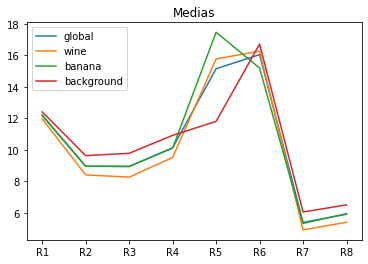

In [20]:

for k in y_vals_M:
    plt.plot(x_labels[:-2], y_vals_M[k][:-2], label=k)
plt.legend()
plt.title('Medias')

Text(0.5, 1.0, 'Desviación típica')

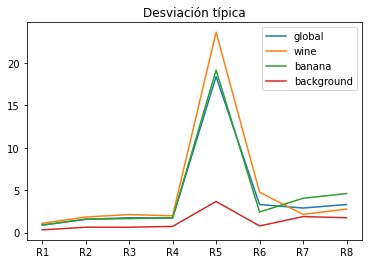

In [21]:

for k in y_vals_S:
    plt.plot(x_labels[:-2], y_vals_S[k][:-2], label=k)
plt.legend()
plt.title('Desviación típica')

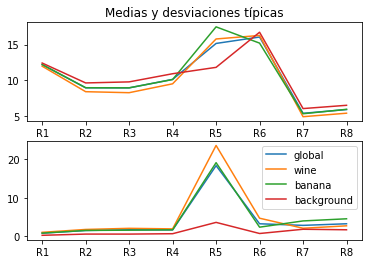

In [40]:
fig, axes = plt.subplots(2, 1)
axes[0].set_title('Medias y desviaciones típicas')

for i, y in zip((0, 1), (y_vals_M, y_vals_S)):
    ax = axes[i]
    for k in y:
        ax.plot(x_labels[:-2], y[k][:-2], label=k)
ax.legend()
